# **PIA: Entrenamiento de una red neuronal convolusional.**

In [ ]:
#EQUIPO 01
#Fabiola Abigail Garcia Perez
#Yessica Sarahi Ontiveros Farrera 
#Lorena Vianey Barron de la Torre
#Diego Isaac Rodriguez Monsivaiz
#Victor Daniel Garcia Tobar
#-------------------------------------------------------------------------------
# Librerías que se ocuparán 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

# Preparar el set de datos 

In [ ]:


# Creamos los directorios para el conjunto de entrenamiento, validación y entrenamiento
train_path = "../input/vegetable-image-dataset/Vegetable Images/train"
validation_path = "../input/vegetable-image-dataset/Vegetable Images/validation"
test_path = "../input/vegetable-image-dataset/Vegetable Images/test"

"""
Normalizamos nuestros sets de datos y creamos un Image Data Generator de cada set para randomizar nuestras
imagenes y evitar el overfitting
"""

# 1. Set de entrenamiento
train_set = ImageDataGenerator(rescale = 1.0/255.0) # Normalización
train_image_generator = train_set.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Set de validación
val_set = ImageDataGenerator(rescale = 1.0/255.0) # Normalización
val_image_generator = train_set.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Set de entrenamiento 
test_set = ImageDataGenerator(rescale = 1.0/255.0) # Normalización
test_image_generator = train_set.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


# Verificar los datos

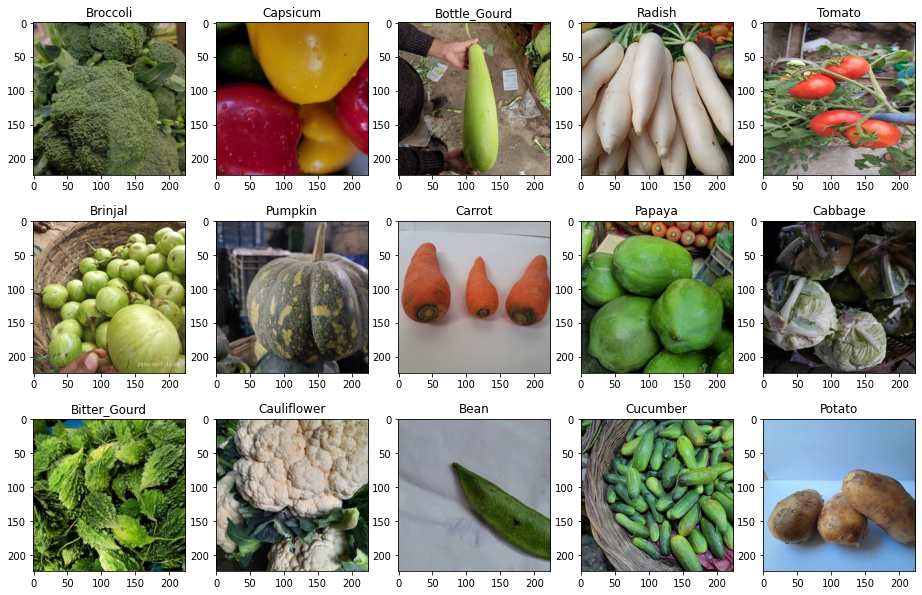

In [ ]:
#Usa
image_categories = os.listdir('../input/vegetable-image-dataset/Vegetable Images/train')

def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(14, 14))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image= images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        # Create Subplot and plot the images
        plt.subplot(5, 5, i+1)
        plt.subplots_adjust(bottom=0.05, right=1, top=1)
        plt.imshow(img_arr)
        plt.title(cat)
      
        
    plt.show()

# Call the function
plot_images(image_categories)
        

In [ ]:
# Impriminos las etiquetas que contiene el set de datos
class_map = dict([(v, c) for c, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


# Building a CNN model

In [ ]:
# Base Convolusional

model = Sequential() 

# Capas
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))


# print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Aplanamiento
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               11214976  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [ ]:

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_image_generator, 
                 epochs=10, 
                 validation_data=val_image_generator)

Epoch 1/10
469/469 [==============================] - 214s 455ms/step - loss: 2.0877 - accuracy: 0.2451 - val_loss: 1.5124 - val_accuracy: 0.4200
Epoch 2/10
469/469 [==============================] - 188s 401ms/step - loss: 1.2978 - accuracy: 0.5109 - val_loss: 0.9956 - val_accuracy: 0.6237
Epoch 3/10
469/469 [==============================] - 187s 399ms/step - loss: 0.9049 - accuracy: 0.6631 - val_loss: 0.8374 - val_accuracy: 0.6960
Epoch 4/10
469/469 [==============================] - 187s 400ms/step - loss: 0.6648 - accuracy: 0.7525 - val_loss: 0.5739 - val_accuracy: 0.7953
Epoch 5/10
469/469 [==============================] - 187s 399ms/step - loss: 0.5194 - accuracy: 0.8104 - val_loss: 0.6405 - val_accuracy: 0.7817
Epoch 6/10
469/469 [==============================] - 186s 397ms/step - loss: 0.4223 - accuracy: 0.8406 - val_loss: 0.4810 - val_accuracy: 0.8357
Epoch 7/10
469/469 [==============================] - 187s 399ms/step - loss: 0.3540 - accuracy: 0.8569 - val_loss: 0.4387 -

In [ ]:
"""Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
history = model.fit(train_image_generator, 
                 epochs=100, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)
                 """

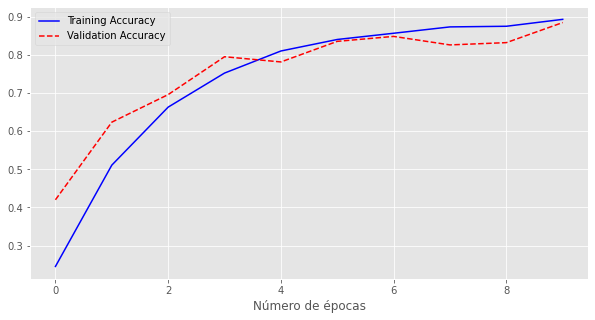

In [ ]:
# Evaluar el modelo

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], c='blue', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], c='red', linestyle='--', label='Validation Accuracy')
plt.xlabel("Número de épocas")
plt.legend(loc='best')
plt.show()

In [ ]:
# Resultados finales del modelo
model.evaluate(test_image_generator)

94/94 [==============================] - 28s 302ms/step - loss: 0.3843 - accuracy: 0.8877


[0.3842736780643463, 0.887666642665863]

In [ ]:
# Probando el modelo con 10 imagenes, cada una de una clasificación diferente 


def generate_predictions(test_image_path, actual_label):
    
    # 1. Procesar imagen
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Crea la predicción 
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Calculado: {}  | Verdadero: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()



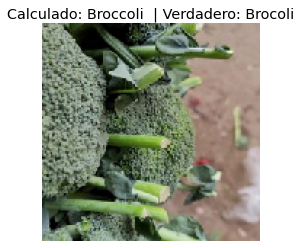

In [ ]:
test_image_1 = '../input/vegetable-image-dataset/Vegetable Images/test/Broccoli/1011.jpg'
generate_predictions(test_image_path, actual_label='Brocoli')

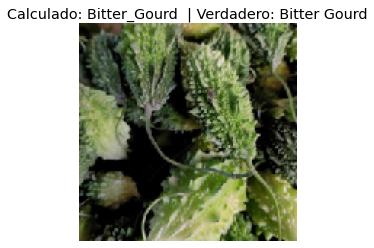

In [ ]:
# Generate predictions for external images
test_image_2 = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Bitter_Gourd/1219.jpg'
generate_predictions(test_image_2, actual_label='Bitter Gourd')

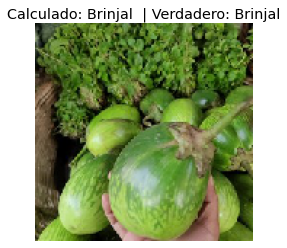

In [ ]:
test_image_3 = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Brinjal/0949.jpg'
generate_predictions(test_image_3, actual_label='Brinjal')

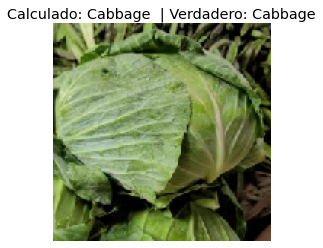

In [ ]:
test_image_4 = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Cabbage/1020.jpg'
generate_predictions(test_image_4, actual_label='Cabbage')

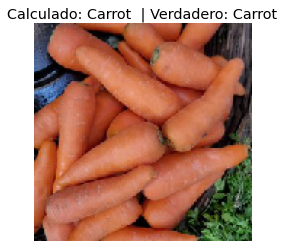

In [ ]:
test_image_5 = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Carrot/1011.jpg'
generate_predictions(test_image_5, actual_label='Carrot')

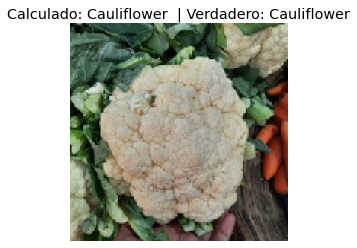

In [ ]:
test_image_6 = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Cauliflower/1058.jpg'
generate_predictions(test_image_6, actual_label='Cauliflower')

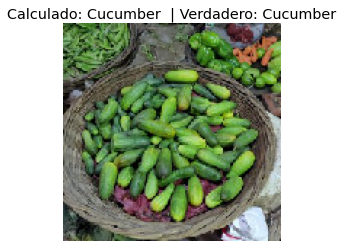

In [ ]:
test_image_7 = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Cucumber/1017.jpg'
generate_predictions(test_image_7, actual_label='Cucumber')

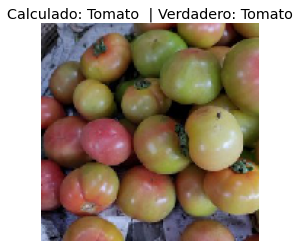

In [ ]:
test_image_8 = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Tomato/1023.jpg'
generate_predictions(test_image_8, actual_label='Tomato')

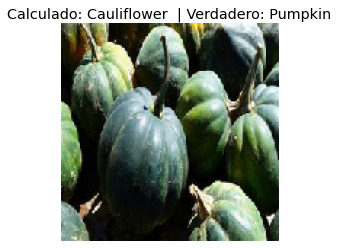

In [ ]:
test_image_9 = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Pumpkin/1020.jpg'
generate_predictions(test_image_9, actual_label='Pumpkin')

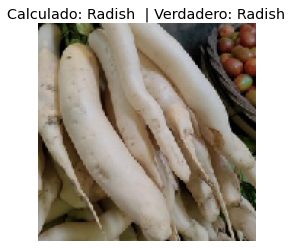

In [ ]:
test_image_10 = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Radish/1030.jpg'
generate_predictions(test_image_10, actual_label='Radish')